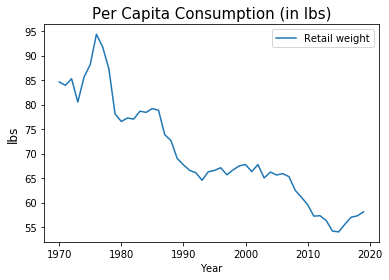

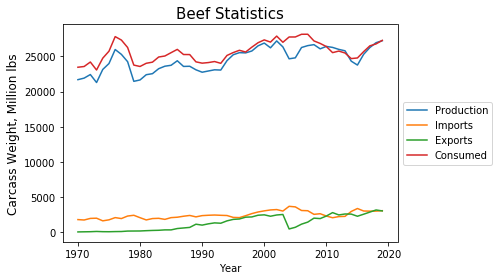

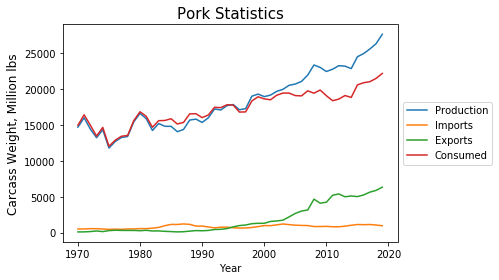

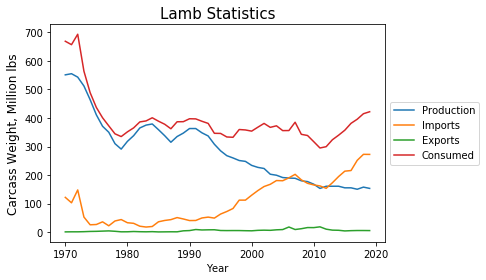

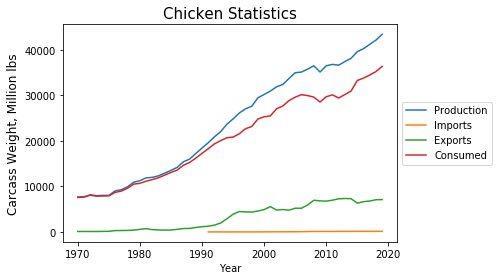

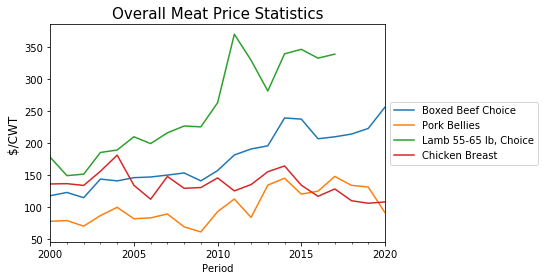

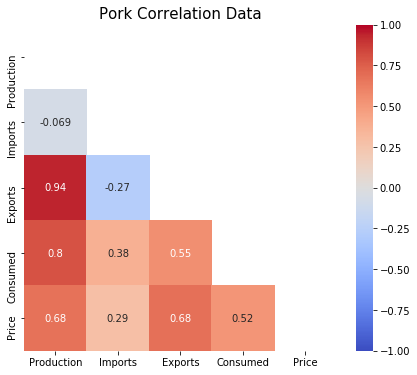

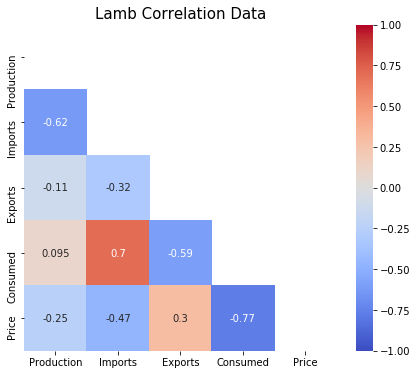

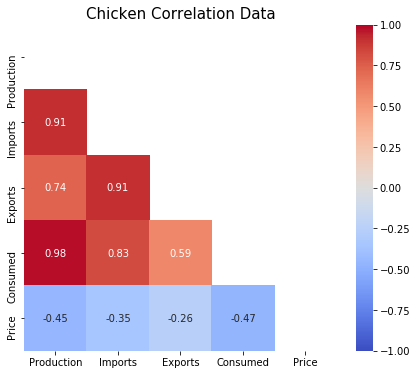

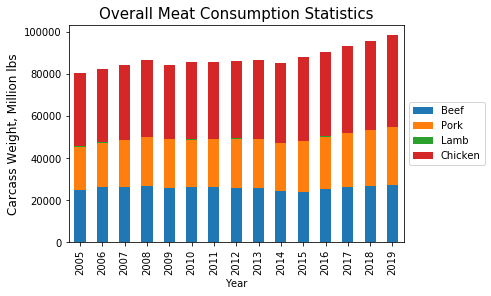

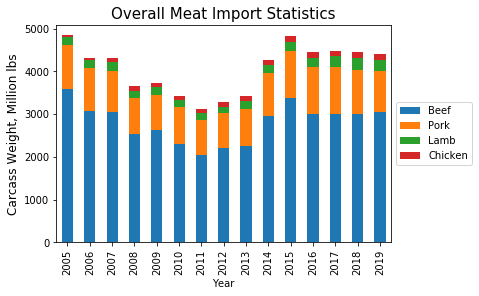

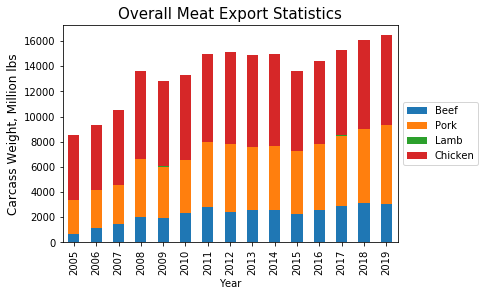

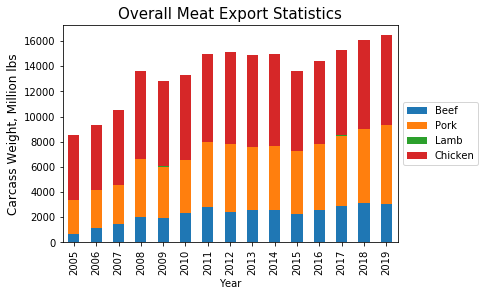

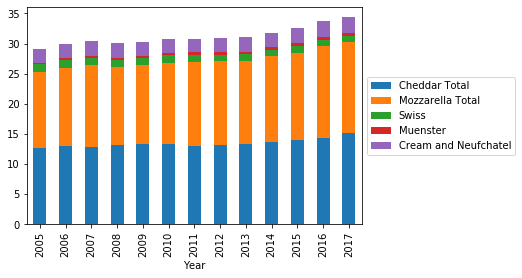

In [362]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
%matplotlib inline

dfbeef = pd.read_excel('MeatSDFull.xlsx',sheet_name='WASDE_Beef-Full',header =2)

dfpork = pd.read_excel('MeatSDFull.xlsx',sheet_name='WASDE_Pork-Full',header =2)

dflamb = pd.read_excel('MeatSDFull.xlsx',sheet_name='WASDE_LambMutton-Full',header =2)

dfchicken = pd.read_excel('MeatSDFull.xlsx',sheet_name='WASDE_Broiler-Full',header =2)

dfwsprice = pd.read_excel('MeatSDFull.xlsx',sheet_name='WASDE_OtherChicken-Full',header =2)

dfbeef.rename(columns={'Unnamed: 0': 'Year','Unnamed: 1': 'Yr'}, inplace=True)
dfbeef['Year'].fillna(method='ffill',inplace=True)
dfbeef.rename(columns={'Total': 'Production','Imports 3/': 'Imports','Exports 3/': 'Exports', 'Total dis-\nappearance\n4/ 5/':'Consumed'}, inplace=True)
dfbeef2 = dfbeef[~dfbeef.Yr.str.contains("Q", na=False)]
dfbeef3 = dfbeef2[0:50]
dfbeef4 = dfbeef3.drop(['Unnamed: 5', 'Unnamed: 15', 'Unnamed: 17'], axis=1)
dfbeef4.plot.line(y=['Retail weight'],x='Year')
#print(dfbeef4.columns)
plt.title('Per Capita Consumption (in lbs)', fontsize=15)
plt.ylabel("lbs", fontsize=12)
#dfbeef4.plot.line(y=['Imports 3/','Exports 3/'],x='Year')

dfpork.rename(columns={'Unnamed: 0': 'Year','Unnamed: 1': 'Yr'}, inplace=True)
dfpork['Year'].fillna(method='ffill',inplace=True)
dfpork.rename(columns={'Total': 'Production','Total dis-\nappearance\n3/ 4/':'Consumed'}, inplace=True)
dfpork2 = dfpork[~dfpork.Yr.str.contains("Q", na=False)]
dfpork3 = dfpork2[0:50]
dfpork4 = dfpork3.drop(['Unnamed: 5', 'Unnamed: 16'], axis=1)
#print(dfpork4[30:50])
#dfpork4.plot.line(y=['Retail weight'],x='Year')
#dfpork4.plot.line(y=['Imports','Exports'],x='Year')

dflamb.rename(columns={'Unnamed: 0': 'Year','Unnamed: 1': 'Yr'}, inplace=True)
dflamb['Year'].fillna(method='ffill',inplace=True)
dflamb.rename(columns={'Total': 'Production','Total dis-\nappearance\n3/ 4/':'Consumed'}, inplace=True)
dflamb2 = dflamb[~dflamb.Yr.str.contains("Q", na=False)]
dflamb3 = dflamb2[0:50]
dflamb4 = dflamb3.drop(['Unnamed: 5', 'Unnamed: 16'], axis=1)

dfchicken.rename(columns={'Unnamed: 0': 'Year','Unnamed: 1': 'Yr'}, inplace=True)
dfchicken['Year'].fillna(method='ffill',inplace=True)
dfchicken.rename(columns={'Net ready-to-cook (RTC) 4/': 'Production', 'Total dis-\nappearance\n5/ 6/':'Consumed'}, inplace=True)
dfchicken2 = dfchicken[~dfchicken.Yr.str.contains("Q", na=False)]
dfchicken3 = dfchicken2[0:50]
dfchicken4 = dfchicken3.drop(['Unnamed: 5','Unnamed: 16'], axis=1)
#print(dfchicken4)

dftot =pd.concat([dfbeef4['Year'],(dfbeef4['Retail weight']+dfpork4['Retail weight']+dflamb4['Retail weight']+dfchicken4['Retail weight'])],axis=1)
dftot.set_index('Year',inplace=True)
dftot.rename(columns={'Retail weight':'Consumed'},inplace=True)
dftot.to_excel("tot_meat_consumed_per_capita.xlsx")


#dfbeef4.plot.line(y=['Retail weight'],x='Year')
#dfpork4.plot.line(y=['Retail weight'],x='Year')
#dflamb4.plot.line(y=['Retail weight'],x='Year')

ax1 = dfbeef4.plot.line(y=['Production','Imports','Exports','Consumed'],x='Year')
plt.title('Beef Statistics', fontsize=15)
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Carcass Weight, Million lbs", fontsize=12)
ax2 = dfpork4.plot.line(y=['Production','Imports','Exports','Consumed'],x='Year')
plt.title('Pork Statistics', fontsize=15)
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Carcass Weight, Million lbs", fontsize=12)
ax3 = dflamb4.plot.line(y=['Production','Imports','Exports','Consumed'],x='Year')
plt.title('Lamb Statistics', fontsize=15)
ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Carcass Weight, Million lbs", fontsize=12)
ax4 = dfchicken4.plot.line(y=['Production','Imports','Exports','Consumed'],x='Year')
plt.title('Chicken Statistics', fontsize=15)
ax4.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Carcass Weight, Million lbs", fontsize=12)


dfwsprice = pd.read_excel('WholesalePrices_new.xlsx',sheet_name='Historical',header=2)
dfwsprice.Period =  pd.to_datetime(dfwsprice.Period)
#dfwsprice.set_index('Period',inplace=True)
dfwsprice.replace(0, np.nan, inplace=True)
dfwsprice['Bellies, 10-12 lb skin on trmd.'].fillna(method='ffill',inplace=True)
dfwsprice.rename(columns={'Bellies, 10-12 lb skin on trmd.': 'Pork Bellies','Breast, boneless':'Chicken Breast'}, inplace=True)
dfprice = pd.concat([dfwsprice['Period'],dfwsprice['Boxed Beef Choice'],dfwsprice['Pork Bellies'],dfwsprice['Lamb 55-65 lb, Choice'],dfwsprice['Chicken Breast']],axis=1)
#print(dfprice[100:200])
dfprice.Period =  pd.to_datetime(dfprice.Period)
dfprice.set_index('Period',inplace=True)
ax5 = dfprice.resample('A').mean().plot()
ax5.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("$/CWT", fontsize=12)
plt.title('Overall Meat Price Statistics', fontsize=15)
dfnew = dfprice.resample('A').sum()
dfnew.index = pd.to_datetime(dfnew.index)
dfnew['Year'] = dfnew.index.year
dfnew.set_index('Year',inplace=True)
#print(dfnew[0:20])


########### Seaborn Plots #######################
fns1, axns1 = plt.subplots(figsize=(7, 6))
dfpork44 = dfpork4.set_index('Year')
corr_pork = pd.concat([dfpork44[30:50],dfnew[0:20]['Pork Bellies']],axis=1)
dfporksns = corr_pork[['Production','Imports','Exports','Consumed','Pork Bellies']]
dfporksnsF = dfporksns.rename(columns={'Pork Bellies': 'Price'})
matrix = np.triu(dfporksnsF.corr())
sns.heatmap(dfporksnsF.corr(),annot=True, mask=matrix,vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
plt.title('Pork Correlation Data', fontsize=15)

fns2, axns2 = plt.subplots(figsize=(7, 6))
dflamb44 = dflamb4.set_index('Year')
corr_lamb = pd.concat([dflamb44[30:50],dfnew[0:20]['Lamb 55-65 lb, Choice']],axis=1)
dflambsns = corr_lamb[['Production','Imports','Exports','Consumed','Lamb 55-65 lb, Choice']]
dflambsnsF = dflambsns.rename(columns={'Lamb 55-65 lb, Choice': 'Price'})
matrix = np.triu(dflambsnsF.corr())
sns.heatmap(dflambsnsF.corr(),annot=True, mask=matrix,vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
plt.title('Lamb Correlation Data', fontsize=15)

fns3, axns3 = plt.subplots(figsize=(7, 6))
dfchicken44 = dfchicken4.set_index('Year')
corr_chicken = pd.concat([dfchicken44[30:50],dfnew[0:20]['Chicken Breast']],axis=1)
dfchickensns = corr_chicken[['Production','Imports','Exports','Consumed','Chicken Breast']]
dfchickensnsF = dfchickensns.rename(columns={'Chicken Breast': 'Price'})
matrix = np.triu(dfchickensnsF.corr())
sns.heatmap(dfchickensnsF.corr(),annot=True, mask=matrix,vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
plt.title('Chicken Correlation Data', fontsize=15)

####################################################

###### Meat Consumption Statistics######################
dfprod = pd.concat([dfbeef4.Year,dfbeef4.Production,dfpork4.Production,dflamb4.Production,dfchicken4.Production], axis=1)
dfprod.columns = pd.io.parsers.ParserBase({'names':dfprod.columns})._maybe_dedup_names(dfprod.columns)
dfprod.set_index('Year',inplace=True)
dfprod.rename(columns={'Production': 'Beef','Production.1':'Pork','Production.2':'Lamb','Production.3':'Chicken'}, inplace=True)
dfprod2 = dfprod[35:50]
ax6 = dfprod2.plot(kind='bar',stacked='true')
ax6.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Carcass Weight, Million lbs", fontsize=12)
plt.title('Overall Meat Consumption Statistics', fontsize=15)
#########################################################

############### Import and Export Statistic########################
dfimp = pd.concat([dfbeef4.Year,dfbeef4.Imports,dfpork4.Imports,dflamb4.Imports,dfchicken4.Imports], axis=1)
dfimp.columns = pd.io.parsers.ParserBase({'names':dfimp.columns})._maybe_dedup_names(dfimp.columns)
dfimp.set_index('Year',inplace=True)
dfimp.rename(columns={'Imports': 'Beef','Imports.1':'Pork','Imports.2':'Lamb','Imports.3':'Chicken'}, inplace=True)
dfimp2 = dfimp[35:50]
ax7 = dfimp2.plot(kind='bar',stacked='true')
ax7.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Carcass Weight, Million lbs", fontsize=12)
plt.title('Overall Meat Import Statistics', fontsize=15)


dfexp = pd.concat([dfbeef4.Year,dfbeef4.Exports,dfpork4.Exports,dflamb4.Exports,dfchicken4.Exports], axis=1)
dfexp.columns = pd.io.parsers.ParserBase({'names':dfexp.columns})._maybe_dedup_names(dfexp.columns)
dfexp.set_index('Year',inplace=True)
dfexp.rename(columns={'Exports': 'Beef','Exports.1':'Pork','Exports.2':'Lamb','Exports.3':'Chicken'}, inplace=True)
dfexp2 = dfexp[35:50]
ax7 = dfexp2.plot(kind='bar',stacked='true')
ax7.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Carcass Weight, Million lbs", fontsize=12)
plt.title('Overall Meat Export Statistics', fontsize=15)

dfexp = pd.concat([dfbeef4.Year,dfbeef4.Exports,dfpork4.Exports,dflamb4.Exports,dfchicken4.Exports], axis=1)
dfexp.columns = pd.io.parsers.ParserBase({'names':dfexp.columns})._maybe_dedup_names(dfexp.columns)
dfexp.set_index('Year',inplace=True)
dfexp.rename(columns={'Exports': 'Beef','Exports.1':'Pork','Exports.2':'Lamb','Exports.3':'Chicken'}, inplace=True)
dfexp2 = dfexp[35:50]
dfexp2.to_excel("outputnew.xlsx") 
ax7 = dfexp2.plot(kind='bar',stacked='true')
ax7.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Carcass Weight, Million lbs", fontsize=12)
plt.title('Overall Meat Export Statistics', fontsize=15)

####################################################################

dfcheese = pd.read_excel('cheese_per_cap.xlsx',sheet_name='Cheese per cap since \'95',header =2)
dfcheese.rename(columns={'Unnamed: 0': 'Year'}, inplace=True)
dfcheese2 = dfcheese[10:23]
ax = dfcheese2.plot(kind='bar',stacked='true',y=['Cheddar Total','Mozzarella Total','Swiss','Muenster','Cream and Neufchatel'],x='Year')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


Text(0.5, 0, 'Million lbs')

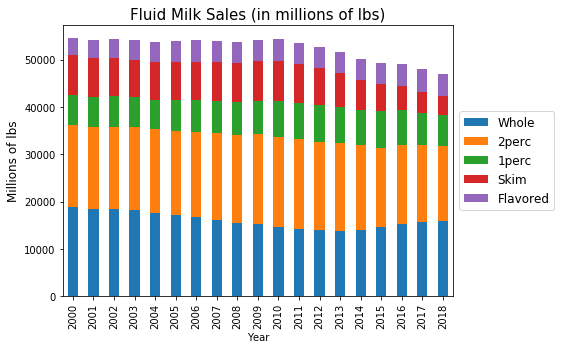

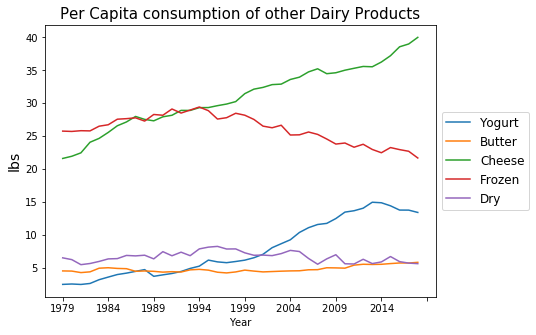

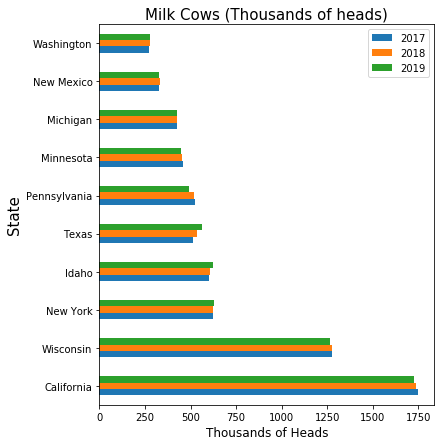

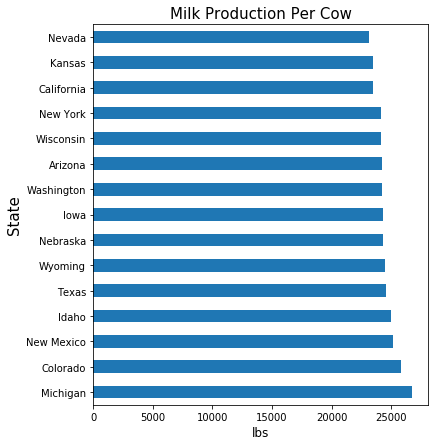

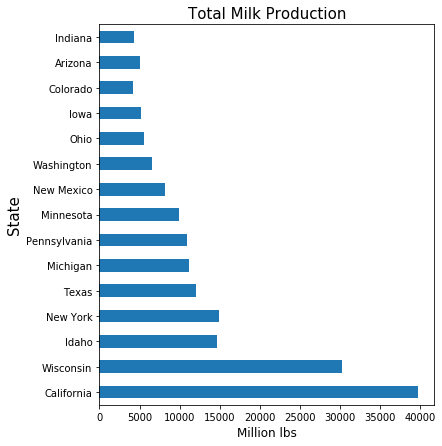

In [601]:
dfmilk = pd.read_excel('fluidmilk.xlsx',sheet_name='fluidmilk',header =1)
dfmilk.rename(columns={'Unnamed: 0': 'Year','Reduced-fat (2 % milk fat)':'2perc','Low-fat \n(1 % milk fat)':'1perc','Total 1':'Total'}, inplace=True)
dfmilk2 = dfmilk[25:44]
dfmilk3 = dfmilk2.drop(['Eggnog'], axis=1)
dfmilk3.set_index('Year',inplace=True)
dfmilk3['Flavored'] = dfmilk3['Flavored whole'] + dfmilk3['Flavored, other than whole']
dfmilk4 = dfmilk3.drop(['Flavored whole','Flavored, other than whole','Buttermilk','Total'], axis=1)
dfmilk4
axm = dfmilk4.plot(kind='bar',stacked='true',figsize=(7,5))
axm.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=12)
plt.title('Fluid Milk Sales (in millions of lbs)', fontsize=15)
plt.ylabel("Millions of lbs", fontsize=12)
#axm = dfmilk3.plot(kind='barh',y = ['Sum_of_Donations','Average $ per donation'],rot=0,log=True,figsize=(40,30))

#dfcheese = pd.read_excel('cheese_per_cap.xlsx',sheet_name='Cheese per cap since \'95',header =2)
#dfcheese.rename(columns={'Unnamed: 0': 'Year'}, inplace=True)
#dfcheese2 = dfcheese[10:23]
#axc = dfcheese2.plot(kind='bar',stacked='true',y=['Cheddar Total','Mozzarella Total','Swiss','Muenster','Cream and Neufchatel'],x='Year')
#axc.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.title('Cheese Consumption (in lbs)', fontsize=15)
#plt.ylabel("lbs", fontsize=12)

dfdairy = pd.read_excel('pcconsp_1_.xlsx',sheet_name='per capita',header =6)
dfdairy.rename(columns={'Unnamed: 0': 'Year','Unnamed: 2': 'Yogurt','milk-fat':'All'},inplace=True)
dfdairy.set_index('Year',inplace=True)
dfdairy['Cheese'] = dfdairy['American'] + dfdairy['Other'] + dfdairy['Cottage']
dfdairy['Frozen'] = dfdairy['Regular'] + dfdairy['Reduced'] + dfdairy['Sherbet'] + dfdairy['frozen']
dfdairy['Dry'] = dfdairy['whole'] + dfdairy['Nonfat'] + dfdairy['butter-'] +  dfdairy['and']
dfdairy2 = dfdairy.drop(['Unnamed: 7', 'Unnamed: 11', 'Unnamed: 16' ,'Unnamed: 21','American','Other','Cottage','Canned,','Bulk,','canned,','Regular','Reduced','Sherbet','frozen','whole','Nonfat','butter-','and','Fluid ','All'],axis=1)
dfdairy3 = dfdairy2.dropna()
dfdairy4 = dfdairy3[4:58]
#dfdairy4.columns
axd = dfdairy4.plot.line(figsize=(7,5),fontsize=10)
plt.title('Per Capita consumption of other Dairy Products', fontsize=15)
plt.ylabel("lbs", fontsize=14)
axd.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=12)

dfcows = pd.read_excel('milkcowsandprod.xlsx',sheet_name='Milk cows',header =1)
dfcows['Unnamed: 0'].fillna(method='ffill',inplace=True)
dfcows.rename(columns={'Unnamed: 0': 'Region','Back to content page.':'State'},inplace=True)
#dfwsprice.Period =  pd.to_datetime(dfwsprice.Period)
#dfcows.set_index('State',inplace=True)
dfcows2 = dfcows[0:72]
dfcows3 = dfcows2.dropna()
dfcows3.set_index('State',inplace=True)
dfcows4 = dfcows3.drop(['Region'],axis=1)
dfcows4.sort_values(by=[dfcows4.columns[2]],ascending=False,inplace=True)
dfcows4.head(10).plot(kind='barh',figsize=(6,7))
plt.title('Milk Cows (Thousands of heads)', fontsize=15)
plt.ylabel("State", fontsize=15)
plt.xlabel("Thousands of Heads", fontsize=12)

dfmpc = pd.read_excel('milkcowsandprod.xlsx',sheet_name='Milk per cow',header =1)
dfmpc['Unnamed: 0'].fillna(method='ffill',inplace=True)
dfmpc.rename(columns={'Unnamed: 0': 'Region','Back to content page.':'State'},inplace=True)
dfmpc2 = dfmpc[0:72]
dfmpc3 = dfmpc2.dropna()
dfmpc3.set_index('State',inplace=True)
dfmpc4 = dfmpc3.drop(['Region'],axis=1)
dfmpc4.sort_values(by=[dfmpc4.columns[2]],ascending=False,inplace=True)
fnumcow, axnumcow = plt.subplots(figsize=(6, 7))
dfmpc4[dfmpc4.columns[2]].head(15).plot(kind='barh')
plt.title('Milk Production Per Cow', fontsize=15)
plt.ylabel("State", fontsize=15)
plt.xlabel("lbs", fontsize=12)


dfmpr = pd.read_excel('milkcowsandprod.xlsx',sheet_name='Milk production',header =1)
dfmpr['Unnamed: 0'].fillna(method='ffill',inplace=True)
dfmpr.rename(columns={'Unnamed: 0': 'Region','Back to content page.':'State'},inplace=True)
dfmpr2 = dfmpr[0:72]
dfmpr3 = dfmpr2.dropna()
dfmpr3.set_index('State',inplace=True)
dfmpr4 = dfmpr3.drop(['Region'],axis=1)
dfmpr4.sort_values(by=[dfmpr4.columns[2]],ascending=False,inplace=True)
fmpr, axmpr = plt.subplots(figsize=(6, 7))
dfmpr4[dfmpr.columns[2]].head(15).plot(kind='barh')
plt.title('Total Milk Production', fontsize=15)
plt.ylabel("State", fontsize=15)
plt.xlabel("Million lbs", fontsize=12)